In [6]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [7]:
df=pd.read_csv("data.csv")

In [9]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [21]:
df.shape ## how many rows and columns

(110527, 14)

In [22]:
## convert to proper date format
df["ScheduledDay"]=pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')

In [23]:
df["AppointmentDay"]=pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [24]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
# like it will give number basied on weekdays like 1 means monday 5 means saturday
df['sch_weekday']=df['ScheduledDay'].dt.dayofweek

In [26]:
##appoinment day
df['App_weekend']=df['AppointmentDay'].dt.dayofweek

In [28]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,App_weekend
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,1,1
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,1,1
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,2,1
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,2,1
110526,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,2,1


In [29]:
df['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [30]:
df['App_weekend'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: App_weekend, dtype: int64

In [36]:
#changing the name of some cloumns
df= df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int64         
 12  App_weekend     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


In [34]:
df.drop(["PatientId","AppointmentID","Neighbourhood"],axis=1,inplace=True)

In [38]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,App_weekend
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4


Text(0.5, 0.9, 'Count Of Traget Variable Per Category')

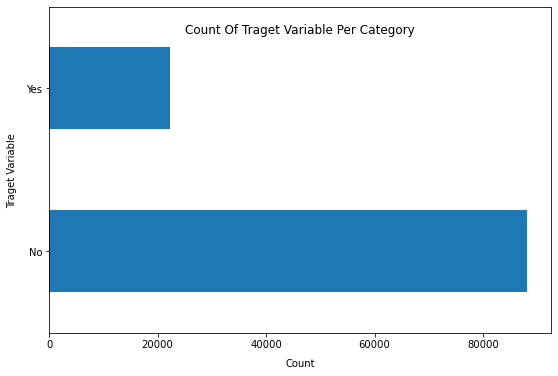

In [57]:
df['NoShow'].value_counts().plot(kind="barh",figsize=(9,6))
plt.xlabel("Count",labelpad=9)
plt.ylabel("Traget Variable",labelpad=9)
plt.title("Count Of Traget Variable Per Category",y=.9)

In [60]:
## Calculating the % of appointments or not 
100*df['NoShow'].value_counts()/len(df ['NoShow'])

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

C:\Users\Hemanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


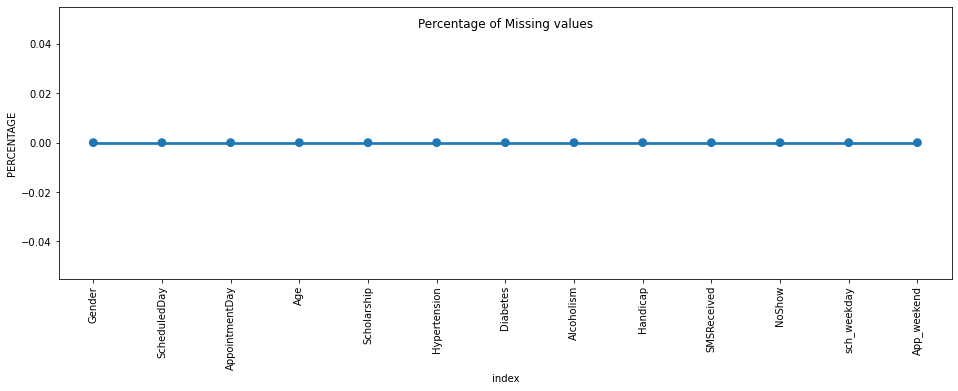

In [69]:
# Having a look that data contains missing values or not
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values",y=.9)
plt.ylabel("PERCENTAGE")
plt.show()

In [62]:
missing

,index,0
0,Gender,0.0
1,ScheduledDay,0.0
2,AppointmentDay,0.0
3,Age,0.0
4,Scholarship,0.0
5,Hypertension,0.0
6,Diabetes,0.0
7,Alcoholism,0.0
8,Handicap,0.0
9,SMSReceived,0.0


C:\Users\Hemanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='index', ylabel='0'>

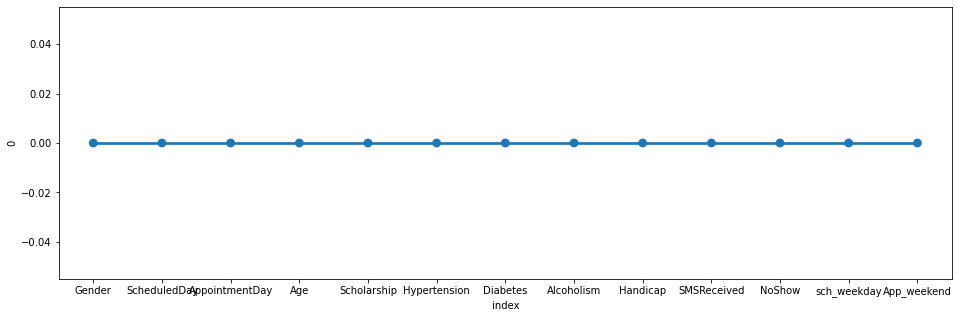

## Missing Data - Initial Intuition
- Here, we don't have any missing data.
### General Thumb Rules:
- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
- As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.

## Data Cleaning
1.Create a copy of base data for manupulation & processing

In [70]:
df1=df.copy()

In [71]:
df1

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,App_weekend
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,1
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,1


In [72]:
## there is no null value so there is no data cleaning is requried

In [73]:
# get the max tenure
print(df1['Age'].max())

115


<AxesSubplot:xlabel='Diabetes', ylabel='count'>

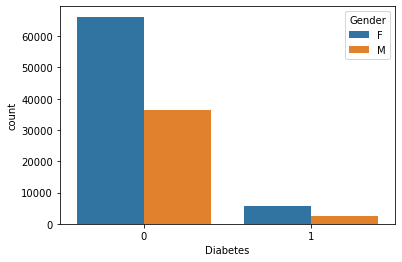

In [89]:
sns.countplot(data=df,x='Diabetes',hue='Gender')

In [82]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

df['Age_group'] = pd.cut(df.Age, range(1, 130, 20), right=False, labels=labels)

In [83]:
df

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,App_weekend,Age_group
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4,61 - 81
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4,41 - 61
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4,61 - 81
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4,1 - 21
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4,41 - 61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1,41 - 61
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1,41 - 61
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,1,21 - 41
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,1,21 - 41


In [84]:
df.drop(['Age'], axis=1, inplace=True)


# Data Exploration

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0    99666
1 

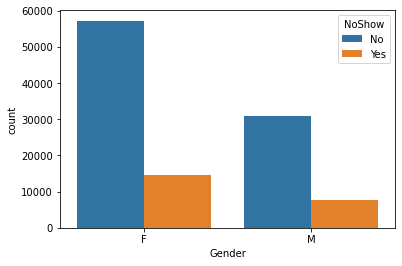

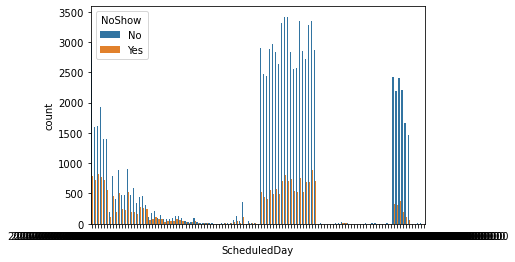

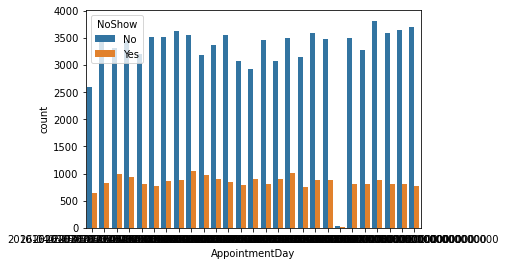

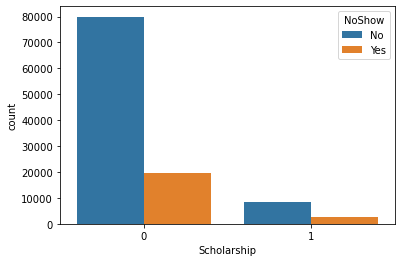

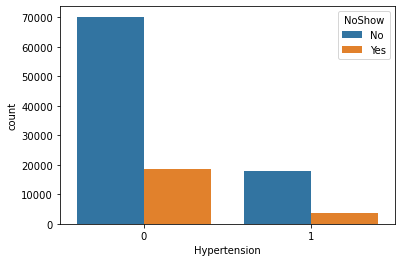

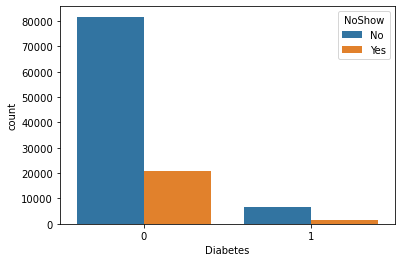

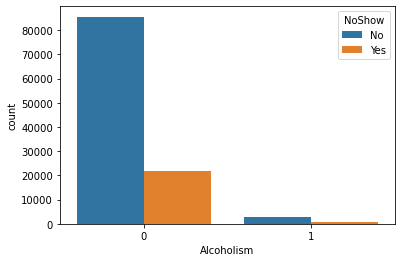

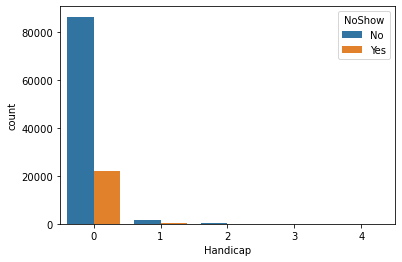

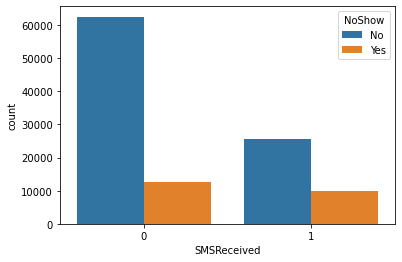

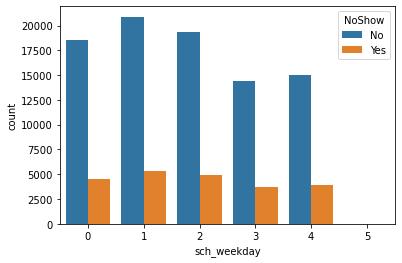

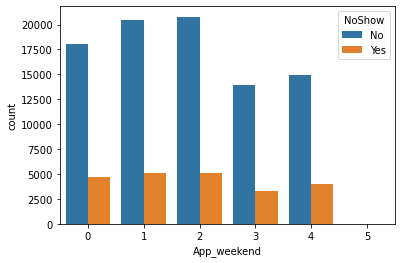

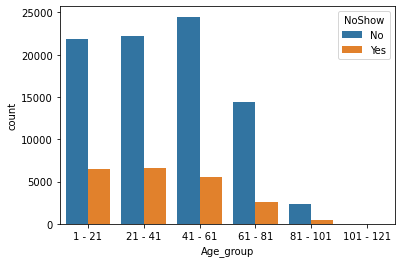

In [85]:
#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(df.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(df[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='NoShow')

In [90]:
df['NoShow'] = np.where(df.NoShow == 'Yes',1,0)

In [91]:
df.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

In [92]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,App_weekend,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


<AxesSubplot:>

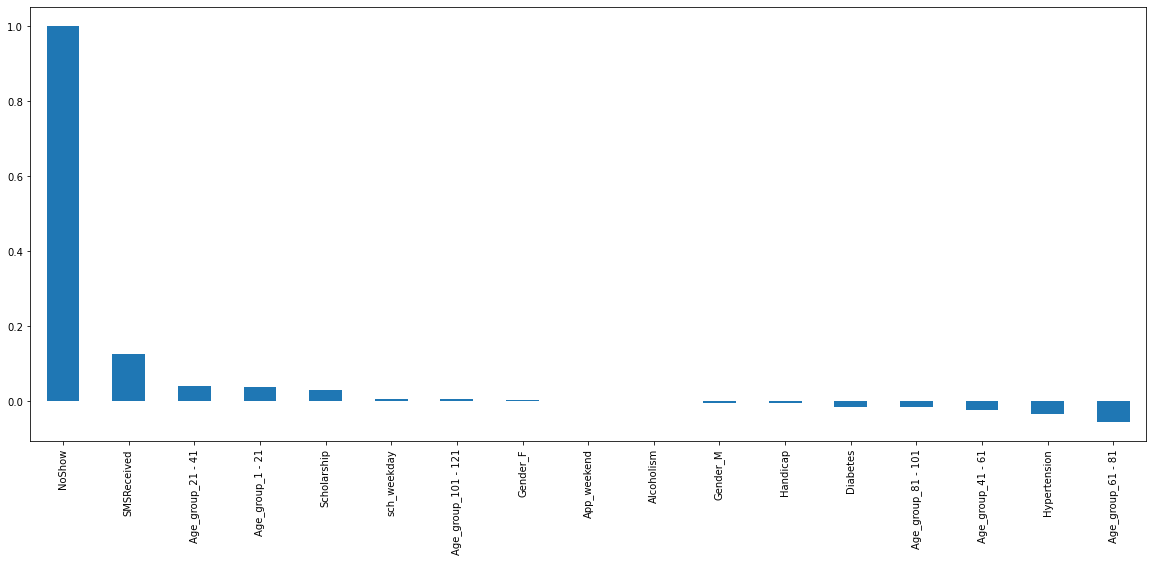

In [93]:
plt.figure(figsize=(20,8))
df_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

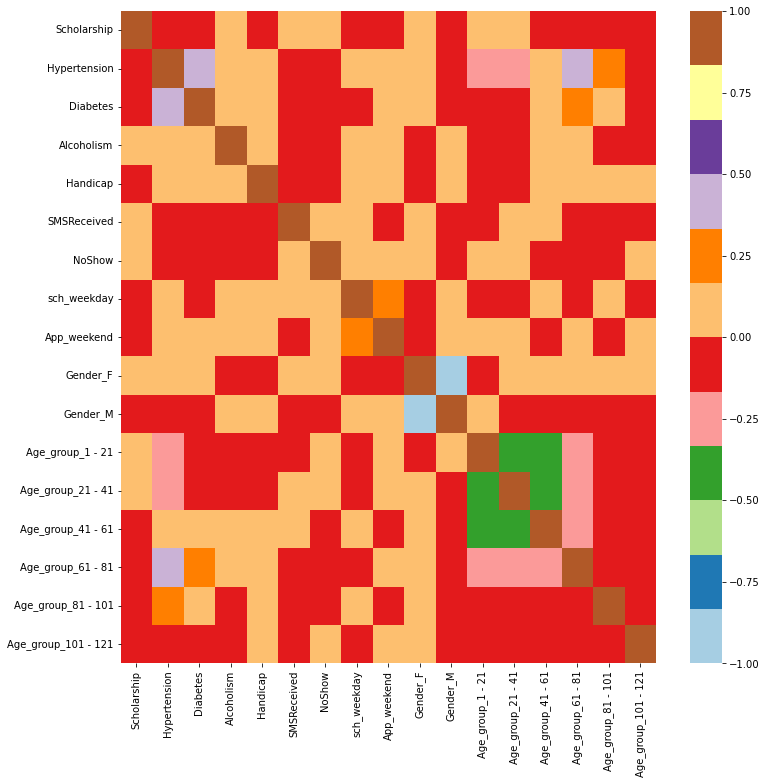

In [94]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

## Bivariate Analysis

In [95]:
new_df1_target0=df.loc[df["NoShow"]==0]
new_df1_target1=df.loc[df["NoShow"]==1]

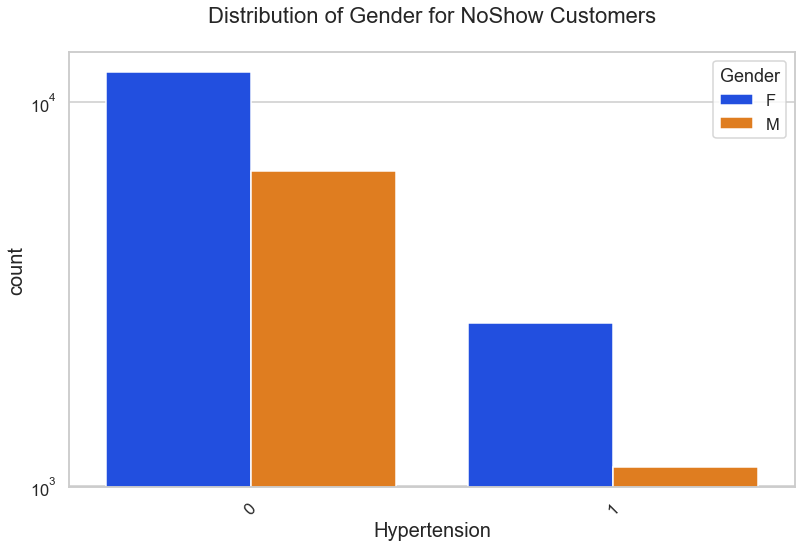

In [96]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

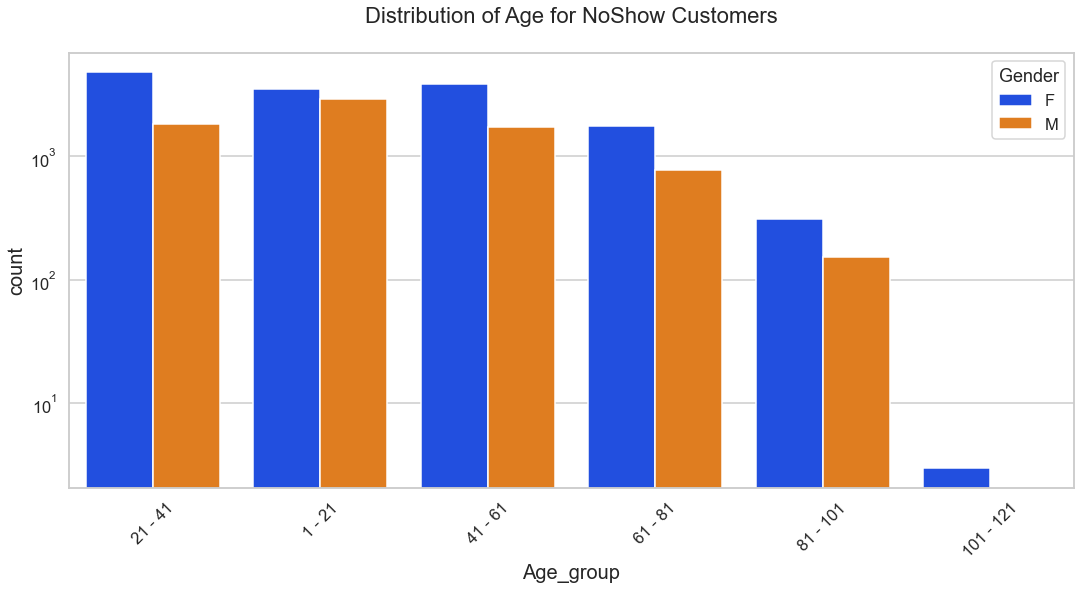

In [97]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')
